**Import Libraries**

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

**Load Dataset**

In [128]:
df = pd.read_csv('/content/sales_data.csv')

In [129]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [131]:
df.shape

(369, 6)

In [132]:
df.columns

Index(['date', 'product', 'category', 'price', 'quantity', 'revenue'], dtype='object')

**EDA**

In [133]:
df.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [134]:
df[df.isnull().any(axis=1)]

,date,product,category,price,quantity,revenue
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN
122,2022-05-01,Smartphone,Electronics,600.0,NaN,6600.0
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [25]:
df.duplicated().sum()

1

**Data Cleaning**

In [135]:
df[df.duplicated]

,date,product,category,price,quantity,revenue
276,2022-10-01,Hoodie,Clothing,40.0,30.0,1200.0


In [136]:
df.drop_duplicates(inplace = True)

In [137]:
df= df.dropna(subset=['price', 'quantity','revenue'])

In [138]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
invalid_dates = df['date'].isna()
df[invalid_dates]

,date,product,category,price,quantity,revenue


In [139]:
df_zero=df[(df.price<0)|(df.price==0)]
df_zero

,date,product,category,price,quantity,revenue


**1. What was the total revenue generated by the company over the course of the year?**

In [140]:
total_revenue = df['revenue'].sum()
total_revenue

747230.0

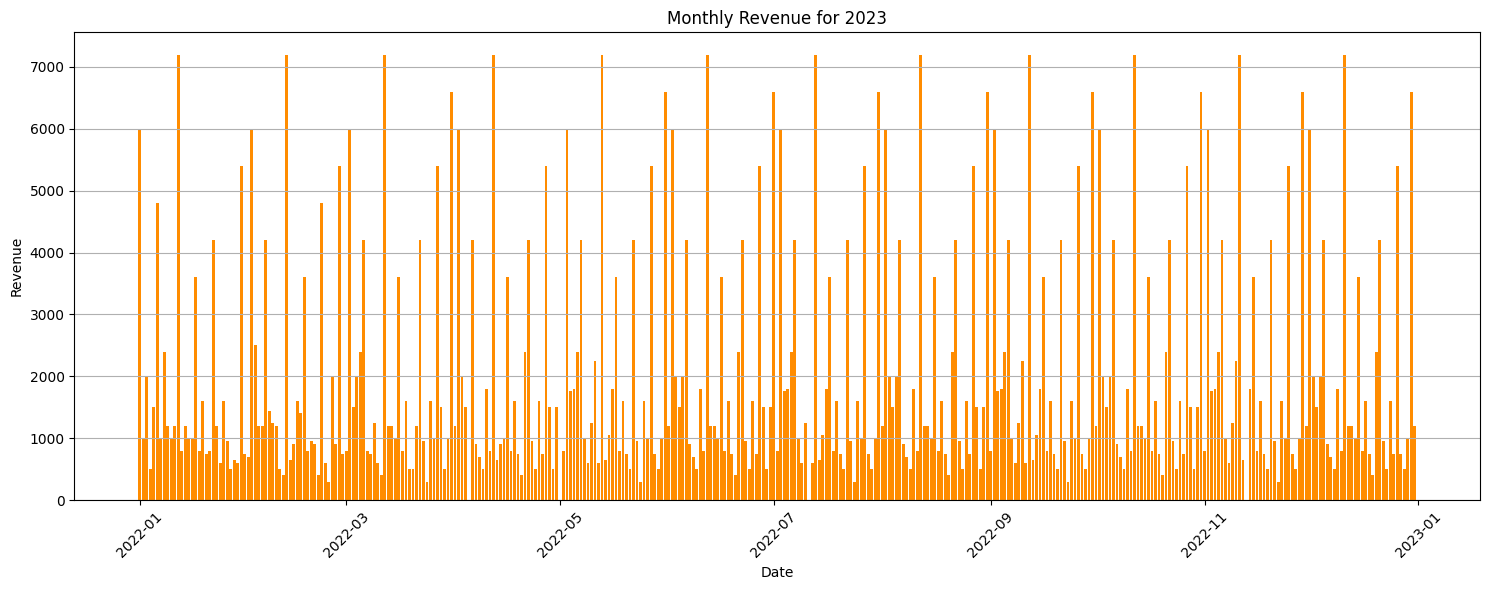

In [141]:
plt.figure(figsize=(15, 6))
plt.bar(df['date'], df['revenue'], color='darkorange')
plt.title('Monthly Revenue for 2023')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**2. Which product had the highest revenue? How much revenue did it generate?**

In [152]:
highest_revenue = df.loc[df['revenue'].idxmax()]
highest_revenue

date        2022-01-12 00:00:00
product              Smartphone
category            Electronics
price                     600.0
quantity                   12.0
revenue                  7200.0
quarter                       1
Name: 13, dtype: object

<BarContainer object of 1 artists>

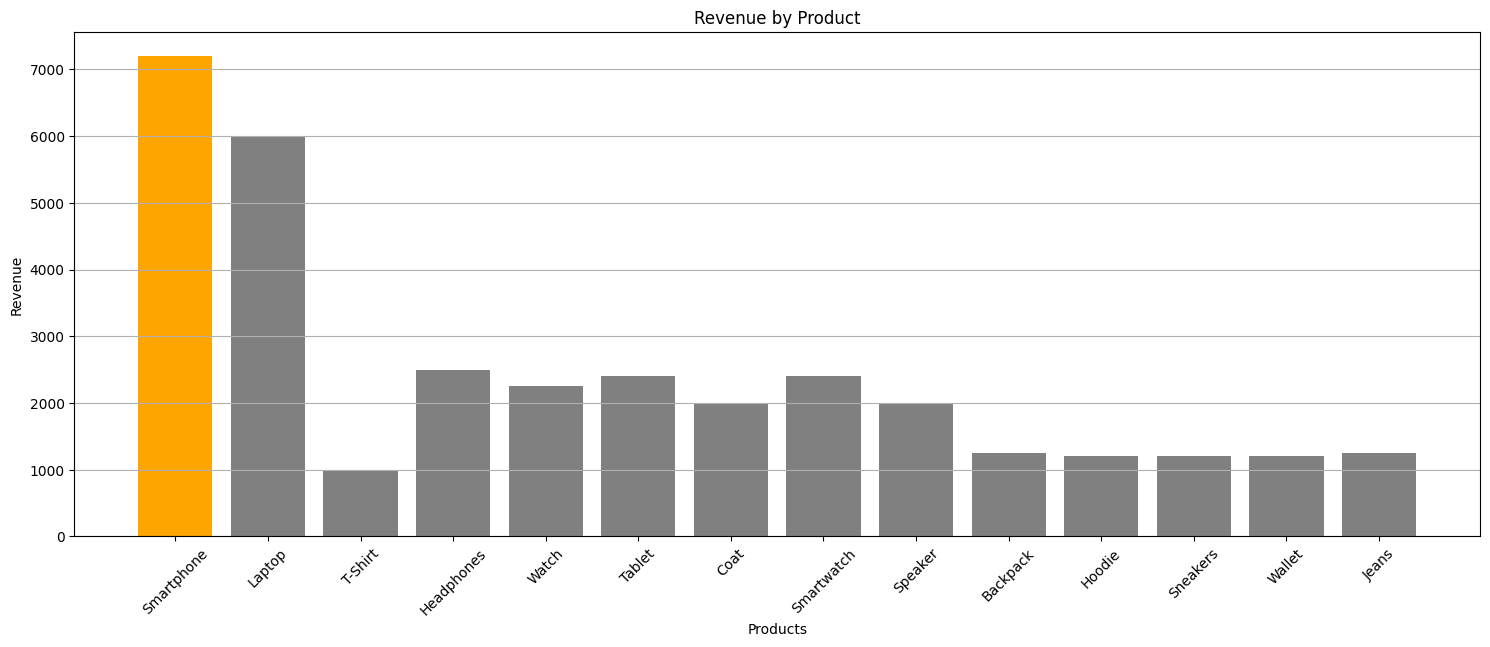

In [153]:
plt.figure(figsize=(15, 6))
plt.bar(df['product'], df['revenue'], color='grey')
plt.title('Revenue by Product')
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(rotation=45)

plt.bar(max_revenue_product['product'], highest_revenue['revenue'], color='orange')

**3. What was the average price of a product sold by the company?**

In [154]:
average_price = df['price'].mean()
print("The average price of a product sold by the company:", average_price)

The average price of a product sold by the company: 210.65934065934067


**4. What was the total quantity of products sold by the company?**

In [155]:
total_quantity = df['quantity'].sum()
print("The total quantity of products sold by the company:", total_quantity)

The total quantity of products sold by the company: 5270.0


**5. Which category had the highest revenue? How much revenue did it generate?**


In [156]:
revenue_by_category = df.groupby('category')['revenue'].sum()

# Find the category with the highest revenue
highest_revenue_category = revenue_by_category.idxmax()
highest_revenue = revenue_by_category.max()

print(f"The category with the highest revenue is '{highest_revenue_category}' with ${highest_revenue}")

The category with the highest revenue is 'Electronics' with $509480.0


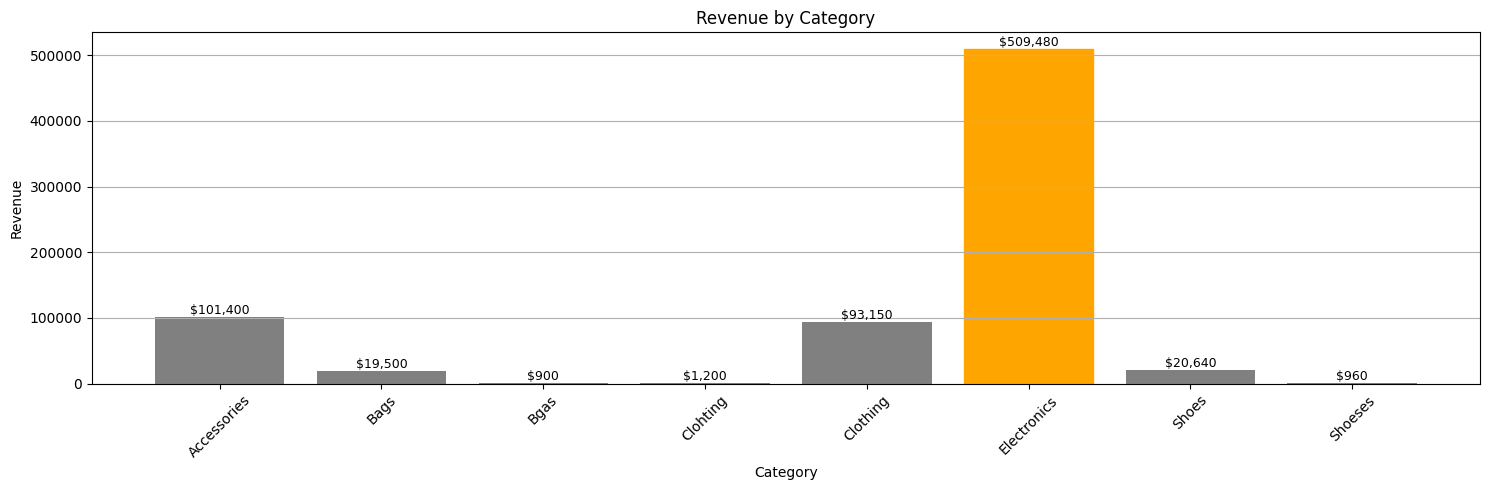

In [157]:
revenue_by_category = df.groupby('category')['revenue'].sum().reset_index()

# Find the category with the highest revenue
highest_revenue_category = revenue_by_category.loc[revenue_by_category['revenue'].idxmax()]

# Plotting the bar chart
plt.figure(figsize=(15, 5))
bars = plt.bar(revenue_by_category['category'], revenue_by_category['revenue'], color='grey')

# Highlight the bar with the highest revenue
highest_revenue_index = revenue_by_category.loc[revenue_by_category['category'] == highest_revenue_category['category']].index[0]
bars[highest_revenue_index].set_color('orange')

plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${:,.0f}'.format(bar.get_height()),
             ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()

**6. What was the average revenue per sale?**

In [159]:
total_revenue = df['revenue'].sum()
total_quantity_sold = df['quantity'].sum()

average_revenue_per_sale = total_revenue / total_quantity_sold

print("The Average Revenue per Sale is:", average_revenue_per_sale)

The Average Revenue per Sale is: 141.78937381404174


**7. What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)**

In [160]:
df['quarter'] = df['date'].dt.quarter
revenue_per_quarter = df.groupby('quarter')['revenue'].sum()

print("Total Revenue per Quarter:")
print(revenue_per_quarter)

Total Revenue per Quarter:
quarter
1    182100.0
2    177370.0
3    195430.0
4    192330.0
Name: revenue, dtype: float64


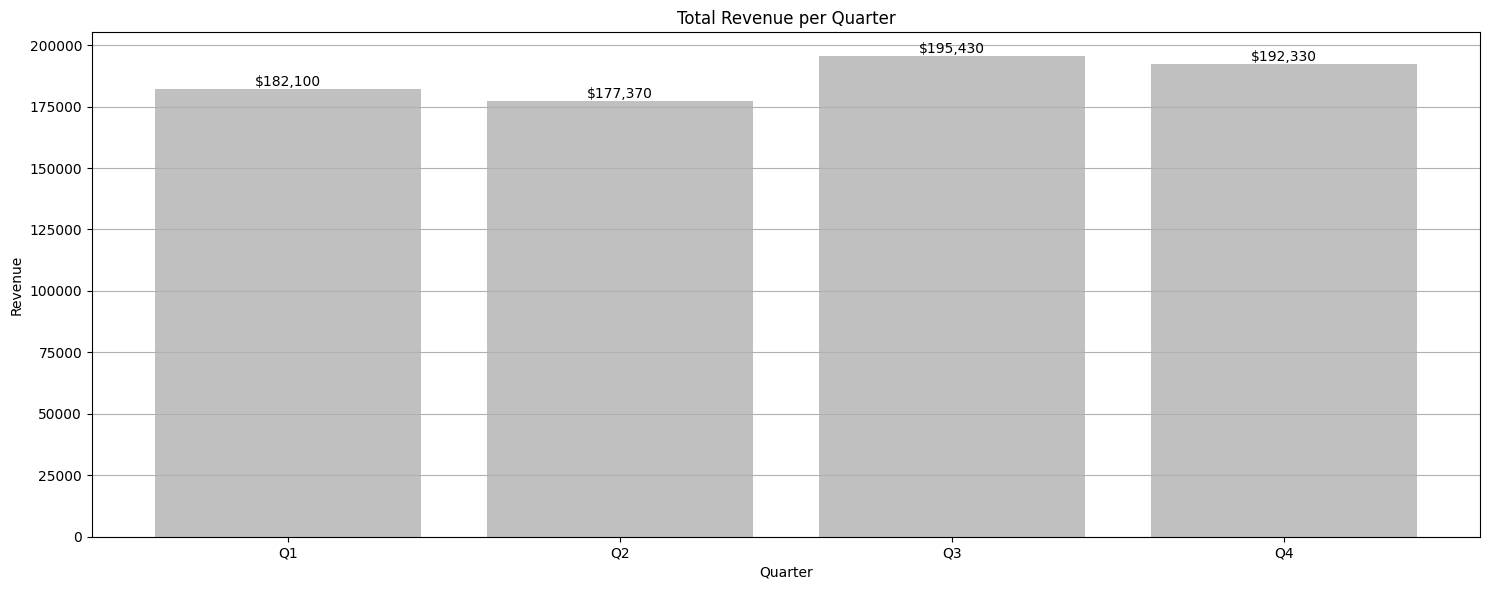

In [161]:
plt.figure(figsize=(15, 6))
quarters = ['Q1', 'Q2', 'Q3', 'Q4']  # Assuming standard quarter labels
plt.bar(quarters, revenue_per_quarter,color='silver')

plt.title('Total Revenue per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.tight_layout()

for i, revenue in enumerate(revenue_per_quarter):
    plt.text(i, revenue, '${:,.0f}'.format(revenue), ha='center', va='bottom', fontsize=10)

plt.show()